<a href="https://colab.research.google.com/github/AutomatonDuck/python_programming/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 3

Iteration #0


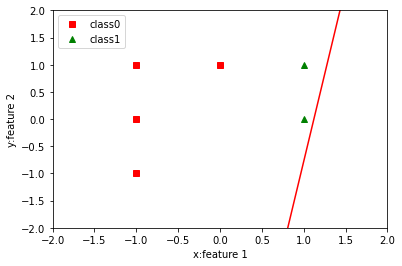

Iteration #1


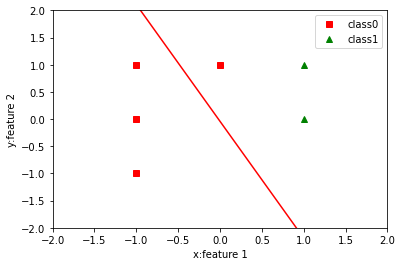

Iteration #1


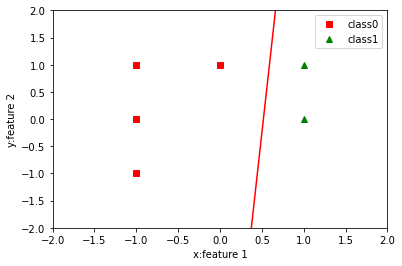

*********************
New Data points:
[[ 2  0  1]
 [ 2  1  0]
 [ 0  0  1]
 [-2  0  0]]
*********************

*********************
Classification for new points: 
[[1]
 [1]
 [0]
 [0]]
*******************



In [77]:
import numpy as np
import matplotlib.pyplot as plt


class NeuralNetwork(object):

  def __init__(self):
    self.weight_matrix = 2 * np.random.random((3,1)) -1
    self.l_rate=1
  
  def hard_limiter(self, x):
    outs=np.zeros(x.shape)
    outs[x>0]=1 ##logical indexing
    return outs

  def forward_propegation(self,inputs):
    outs=np.dot(inputs, self.weight_matrix) ##matrix multiplication
    return self.hard_limiter(outs)

  def pred(self,inputs):
    prob=self.forward_propegation(inputs)
    preds=np.int8(prob>=0.5)
    return preds
  
  def train(self, train_inputs, train_outputs, num_train_iterations):
    for iteration in range(num_train_iterations):
      for i in range(train_inputs.shape[0]):
        pred_i = self.pred(train_inputs[i,:])
        if pred_i != train_outputs[i]:
          output = self.forward_propegation(train_inputs[i,:])
          error = train_outputs[i] - output
          adjustment = self.l_rate*error*train_inputs[i]
          self.weight_matrix[:,0] += adjustment
          print('Iteration #'+str(iteration))
          plot_fun_thr(train_inputs[:,0:2],train_outputs, self.weight_matrix[:,0],classes)
  
  def plot_fun_thr(features,labels,thre_parms,classes):
    plt.plot(features[labels[:]==classes[0],0], features[labels[:]==classes[0],1]
             , 'rs', features[labels[:]==classes[1],0],
             features[labels[:]==classes[1],1], 'g^')
    plt.axis([-2,2,-2,2])
    x1 = np.linspace(-2,2,50)
    x2 = -(thre_parms[0]*x1+thre_parms[2]) /thre_parms[1]
    plt.plot(x1,x2, '-r')
    plt.xlabel('x:feature 1')
    plt.ylabel('y:feature 2')
    plt.legend(['class'+str(classes[0]), 'class'+str(classes[1])])
    plt.show()

features = np.array([[1,1],[1,0],[0,1],[-1,-1],[-1,0],[-1,1]])
#print(features)
label = np.array([1,1,0,0,0,0])
#print(label)
classes = [0,1]

bias=np.ones((features.shape[0],1))
features = np.append(features,bias,axis=1)

#plot_fun(features,label,classes)

new_points = np.array([[2,0,1],[2,1,0], [0,0,1], [-2,0,0]])

neural_network = NeuralNetwork()
#print(neural_network.weight_matrix)
neural_network.train(features, label, 100)
#print(neural_network.pred(features))
print("*********************\nNew Data points:\n" + str(new_points) +"\n*********************\n")
print("*********************\nClassification for new points: \n"+ str(neural_network.pred(new_points))+"\n*******************\n")

